In [1]:
from griddify import datasets

data = datasets.get_compound_descriptors()

In [3]:
from griddify import datasets
from griddify import Griddify

data = datasets.get_compound_descriptors()

gf = Griddify(preprocess=True)
gf.fit(data)
Xi = gf.transform(data)

/home/mduranfrigola/miniconda3/envs/tab2grid/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


In [4]:
from griddify import Preprocessing

pp  = Preprocessing()
pp.fit(data)
data = pp.transform(data)

In [5]:
from griddify import FeatureDistances

fd = FeatureDistances(metric="cosine").calculate(data)

In [6]:
from griddify import Tabular2Cloud

tc = Tabular2Cloud()
tc.fit(fd)
Xc = tc.transform(fd)

/home/mduranfrigola/miniconda3/envs/tab2grid/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


In [7]:
from griddify.plots import cloud_plot

<AxesSubplot:>

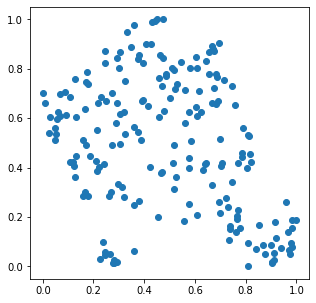

In [8]:
cloud_plot(Xc)

In [9]:
from griddify import Cloud2Grid

cg = Cloud2Grid(max_side=128)
cg.fit(Xc)
Xg = cg.transform(Xc, as_integers=False)

<AxesSubplot:>

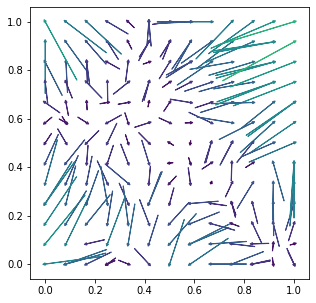

In [10]:
from griddify.plots import arrows_plot

arrows_plot(Xc, Xg, capping_distance=0.5)

In [11]:
from griddify import Cloud2Grid

cg = Cloud2Grid(max_side=128)
cg.fit(Xc)
mappings, side = cg.get_mappings(Xc)

In [12]:
from griddify import Flat2Grid

tg = Flat2Grid(mappings, side)
Xi = tg.transform(data)

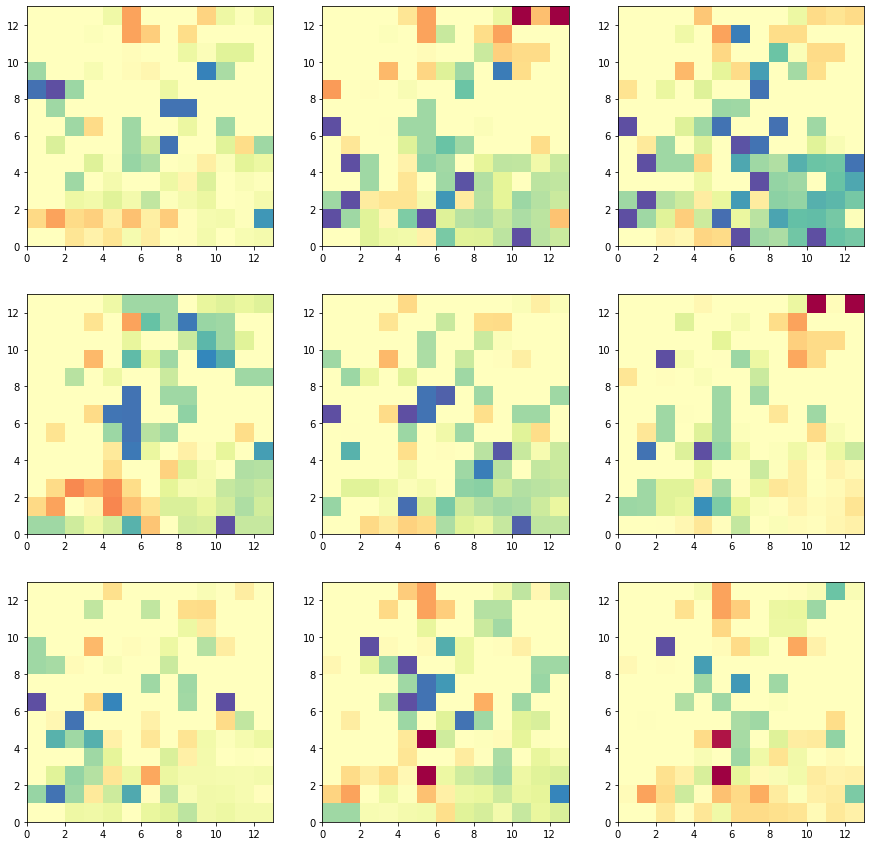

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from griddify.plots import grid_plot
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle


def grid_plot(X, ax=None, s=300):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    cmap = cm.get_cmap("Spectral")
    norm = mpl.colors.Normalize(vmin=-2.3, vmax=2.3)  # TODO
    x = []
    y = []
    z = []
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x += [i]
            y += [j]
            z += [X[i, j]]
    colors = [cmap(norm(z_)) for z_ in z]
    for x_, y_, c_ in zip(x,y,colors):
        rect = Rectangle(xy=(x_,y_), width=1, height=1, facecolor=c_)
        ax.add_patch(rect)
    ax.set_xlim(0, X.shape[0])
    ax.set_ylim(0, X.shape[1])
    return ax


fig, axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.flatten()

for i in range(9):
    ax = axs[i]
    grid_plot(Xi[i], ax=ax, s=50)

In [2]:
import numpy as np

np.sqrt(3200)

56.568542494923804